<a href="https://colab.research.google.com/github/KhresnaPanduI/Tugas-3-CNN-Flower/blob/main/CNN_Tugas_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We will use tensorflow as machine learning library
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Load dataset from google drive

In [ ]:
data = '/content/drive/MyDrive/Datasets/partial flower'

Split data

In [ ]:
image_generator = ImageDataGenerator(
                              validation_split=0.2, #Split data with 0.2 proportion
                              rescale=1/255) # normalize data 

In [ ]:
train_gen = image_generator.flow_from_directory(
                                          directory=data, 
                                          subset='training',
                                          target_size=(320, 240), #resize all image to 320x240
                                          class_mode="categorical",
                                          color_mode="grayscale", 
                                          shuffle=True,
                                          batch_size=32)

val_gen = image_generator.flow_from_directory(
                                          directory=data, 
                                          subset='validation',
                                          target_size=(320, 240), #resize all image to 320x240
                                          class_mode="categorical",
                                          color_mode="grayscale",
                                          shuffle=True,
                                          batch_size=32,)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


Create model architecture

In [ ]:
input_shape = (320, 240, 1)

model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=8, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=16, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu'), 
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 318, 238, 8)       80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 159, 119, 8)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 157, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 78, 58, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 72384)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2316320   
_________________________________________________________________
dense_12 (Dense)             (None, 16)               

Model with default 0.001 learning rate

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_gen,
                 epochs = 50,
                 validation_data = val_gen)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 1.5982 - accuracy: 0.3125 - val_loss: 1.0189 - val_accuracy: 0.5500
Epoch 2/50
8/8 [==============================] - 8s 1s/step - loss: 1.0354 - accuracy: 0.4500 - val_loss: 1.0066 - val_accuracy: 0.4667
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 1.0098 - accuracy: 0.4833 - val_loss: 0.9959 - val_accuracy: 0.5167
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.8981 - accuracy: 0.6000 - val_loss: 0.9525 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 0.8647 - accuracy: 0.6042 - val_loss: 0.9211 - val_accuracy: 0.5500
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.7984 - accuracy: 0.6542 - val_loss: 0.9164 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 8s 1s/step - loss: 0.6813 - accuracy: 0.7208 - val_loss: 0.9035 - val_accuracy: 0.5833
Epoch 8/50
8/8 [=========================

Function to plot accuracy and loss

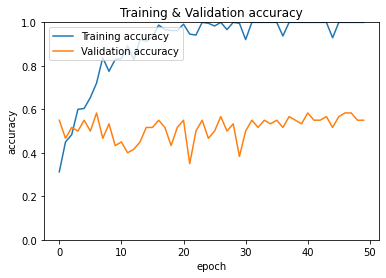

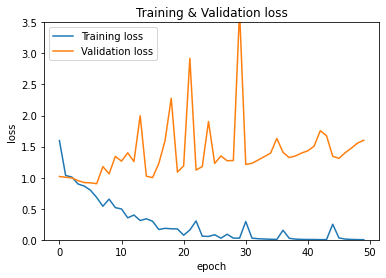

In [ ]:
import matplotlib.pyplot as plt
def plot(model, acc, ymax=1):
  plt.plot(model.history[acc])
  plt.plot(model.history['val_{}'.format(acc)])
  plt.title('Training & Validation {}'.format(acc))
  plt.ylabel(acc)
  plt.xlabel('epoch')
  plt.legend(['Training {}'.format(acc), 'Validation {}'.format(acc)], loc='upper left')
  plt.ylim(ymin=0, ymax=ymax)
  plt.show()


#Plot training & validation accuracy for 0.001 Learning rate
plot(hist, 'accuracy')
#Plot training & validation loss for 0.001 Learning rate
plot(hist, 'loss', ymax=3.5)

Model with 0.1 Learning rate

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist01 = model.fit(train_gen,
                 epochs = 50,
                 validation_data = val_gen)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 370.6551 - accuracy: 0.3583 - val_loss: 1.1114 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 8s 982ms/step - loss: 1.1147 - accuracy: 0.3083 - val_loss: 1.1015 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 8s 979ms/step - loss: 1.1173 - accuracy: 0.2833 - val_loss: 1.1080 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 8s 981ms/step - loss: 1.1042 - accuracy: 0.3208 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 8s 984ms/step - loss: 1.1101 - accuracy: 0.3333 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 8s 982ms/step - loss: 1.1112 - accuracy: 0.3208 - val_loss: 1.1001 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 8s 984ms/step - loss: 1.1265 - accuracy: 0.2500 - val_loss: 1.1025 - val_accuracy: 0.3333
Epoch 8/50
8/8 [=====

Plot model accuracy with 0.1 learning rate

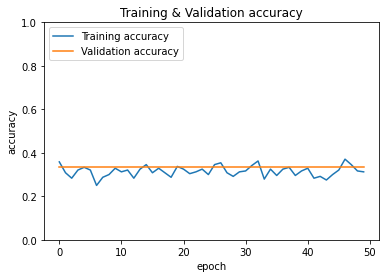

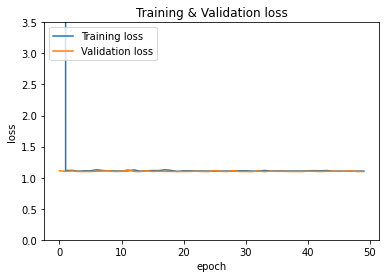

In [ ]:
#Plot training & validation accuracy for 0.1 Learning rate
plot(hist01, 'accuracy')
#Plot training & validation loss for 0.1 Learning rate
plot(hist01, 'loss', ymax=3.5)

Model with 0.8 Learning Rate

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.8),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist08 = model.fit(train_gen,
                 epochs = 50,
                 validation_data = val_gen)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 1.4411 - accuracy: 0.3458 - val_loss: 1.1610 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 8s 1s/step - loss: 1.2129 - accuracy: 0.3208 - val_loss: 1.1369 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 8s 975ms/step - loss: 1.2025 - accuracy: 0.3083 - val_loss: 1.2687 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 8s 975ms/step - loss: 1.2792 - accuracy: 0.3167 - val_loss: 1.2220 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 8s 981ms/step - loss: 1.1829 - accuracy: 0.3542 - val_loss: 1.3727 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 8s 977ms/step - loss: 1.2060 - accuracy: 0.3083 - val_loss: 1.1949 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 8s 979ms/step - loss: 1.2250 - accuracy: 0.3667 - val_loss: 1.1059 - val_accuracy: 0.3333
Epoch 8/50
8/8 [==========

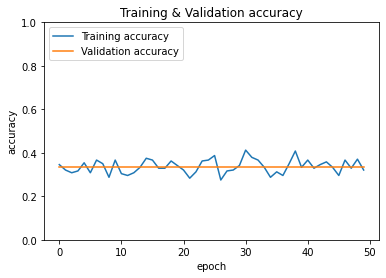

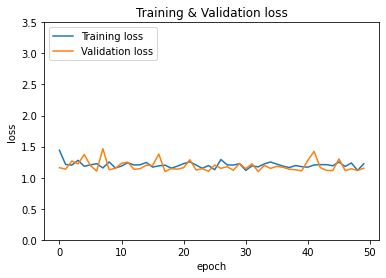

In [ ]:
#Plot training & validation accuracy for 0.1 Learning rate
plot(hist08, 'accuracy')
#Plot training & validation loss for 0.1 Learning rate
plot(hist08, 'loss', ymax=3.5)